In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [7]:
import requests
requests.__version__

'2.24.0'

In [8]:
# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5db1bc44a69ffe1c11d4d822ad20bde3


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | baruun-urt
Processing Record 4 of Set 1 | hongjiang
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | esperance
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | segou
Processing Record 9 of Set 1 | gamba
Processing Record 10 of Set 1 | lagoa
Processing Record 11 of Set 1 | half moon bay
Processing Record 12 of Set 1 | bandundu
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | alofi
Processing Record 16 of Set 1 | alexandria
Processing Record 17 of Set 1 | eslov
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | opalenica
Processing Record 21 of Set 1 | saleaula
City not found. Skipping...
Processing Record 22 of Set 1 | ushuaia
Processing Record

Processing Record 36 of Set 4 | quesnel
Processing Record 37 of Set 4 | katherine
Processing Record 38 of Set 4 | dingle
Processing Record 39 of Set 4 | iqaluit
Processing Record 40 of Set 4 | saint-augustin
Processing Record 41 of Set 4 | shishou
Processing Record 42 of Set 4 | mikhaylovka
Processing Record 43 of Set 4 | altay
Processing Record 44 of Set 4 | lompoc
Processing Record 45 of Set 4 | galesong
Processing Record 46 of Set 4 | airai
Processing Record 47 of Set 4 | kodiak
Processing Record 48 of Set 4 | tynda
Processing Record 49 of Set 4 | guerrero negro
Processing Record 50 of Set 4 | tasiilaq
Processing Record 1 of Set 5 | saint-felicien
Processing Record 2 of Set 5 | myitkyina
Processing Record 3 of Set 5 | kingaroy
Processing Record 4 of Set 5 | constitucion
Processing Record 5 of Set 5 | matagami
Processing Record 6 of Set 5 | port hawkesbury
Processing Record 7 of Set 5 | yanan
City not found. Skipping...
Processing Record 8 of Set 5 | faanui
Processing Record 9 of Set

Processing Record 25 of Set 8 | maple creek
Processing Record 26 of Set 8 | makat
Processing Record 27 of Set 8 | yulara
Processing Record 28 of Set 8 | kruisfontein
Processing Record 29 of Set 8 | uniontown
Processing Record 30 of Set 8 | porto novo
Processing Record 31 of Set 8 | cherskiy
Processing Record 32 of Set 8 | bahadurganj
Processing Record 33 of Set 8 | kloulklubed
Processing Record 34 of Set 8 | ayan
Processing Record 35 of Set 8 | rovaniemi
Processing Record 36 of Set 8 | hambantota
Processing Record 37 of Set 8 | cartagena
Processing Record 38 of Set 8 | mocambique
City not found. Skipping...
Processing Record 39 of Set 8 | huntsville
Processing Record 40 of Set 8 | itoman
Processing Record 41 of Set 8 | thinadhoo
Processing Record 42 of Set 8 | miandoab
Processing Record 43 of Set 8 | piranshahr
Processing Record 44 of Set 8 | lieksa
Processing Record 45 of Set 8 | batagay
Processing Record 46 of Set 8 | lasa
Processing Record 47 of Set 8 | ternate
Processing Record 48 

Processing Record 11 of Set 12 | kinkala
Processing Record 12 of Set 12 | xianyang
Processing Record 13 of Set 12 | mayo
Processing Record 14 of Set 12 | port hedland
Processing Record 15 of Set 12 | kalmunai
Processing Record 16 of Set 12 | balikpapan
Processing Record 17 of Set 12 | namioka
Processing Record 18 of Set 12 | lehigh acres
Processing Record 19 of Set 12 | omboue
Processing Record 20 of Set 12 | khasan
Processing Record 21 of Set 12 | bairiki
Processing Record 22 of Set 12 | yar-sale
Processing Record 23 of Set 12 | havoysund
Processing Record 24 of Set 12 | nanzhang
Processing Record 25 of Set 12 | ponta delgada
Processing Record 26 of Set 12 | taoudenni
Processing Record 27 of Set 12 | mizpe ramon
City not found. Skipping...
Processing Record 28 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 29 of Set 12 | seoul
Processing Record 30 of Set 12 | grootfontein
Processing Record 31 of Set 12 | bagotville
Processing Record 32 of Set 12 | lashio
Processi

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,73.87,66,5,8.52,PF,2020-10-21 19:09:34
1,Butaritari,3.07,172.79,82.47,71,35,8.79,KI,2020-10-21 19:09:34
2,Baruun-Urt,46.68,113.28,20.95,80,0,6.04,MN,2020-10-21 19:09:35
3,Hongjiang,27.11,110.00,54.41,84,14,2.42,CN,2020-10-21 19:09:35
4,Cidreira,-30.18,-50.21,67.24,88,100,14.99,BR,2020-10-21 19:09:36
5,Esperance,-33.87,121.90,57.20,100,90,9.17,AU,2020-10-21 19:09:36
6,Vaini,-21.20,-175.20,71.60,78,75,8.05,TO,2020-10-21 19:09:36
7,Segou,13.43,-6.22,87.91,20,0,3.62,ML,2020-10-21 19:09:36
8,Gamba,-2.65,10.00,77.05,87,100,7.76,GA,2020-10-21 19:09:37
9,Lagoa,39.05,-27.98,63.32,68,0,20.47,PT,2020-10-21 19:09:37


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
df = city_data_df[new_column_order]

In [22]:
df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-10-21 19:09:34,-23.12,-134.97,73.87,66,5,8.52
1,Butaritari,KI,2020-10-21 19:09:34,3.07,172.79,82.47,71,35,8.79
2,Baruun-Urt,MN,2020-10-21 19:09:35,46.68,113.28,20.95,80,0,6.04
3,Hongjiang,CN,2020-10-21 19:09:35,27.11,110.00,54.41,84,14,2.42
4,Cidreira,BR,2020-10-21 19:09:36,-30.18,-50.21,67.24,88,100,14.99
...,...,...,...,...,...,...,...,...,...
562,Paita,PE,2020-10-21 19:12:46,-5.09,-81.11,78.80,69,10,14.99
563,Port Blair,IN,2020-10-21 19:12:46,11.67,92.75,80.94,83,83,10.92
564,Algeciras,ES,2020-10-21 19:12:47,36.13,-5.45,66.20,88,75,6.93
565,Porbandar,IN,2020-10-21 19:12:47,21.64,69.61,82.78,78,0,10.11


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1603307646.1990001

In [33]:
today = time.strftime("%x")
today

'10/21/20'

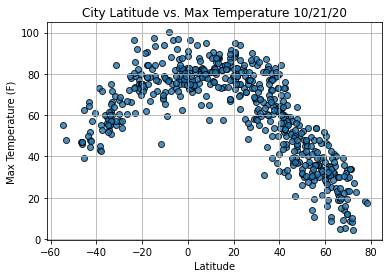

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


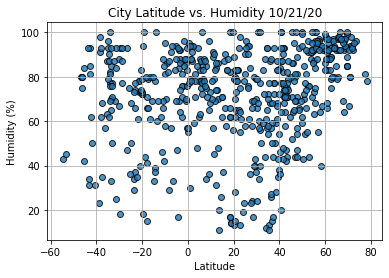

In [38]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


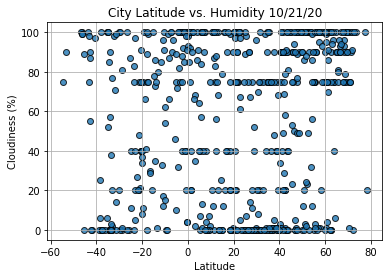

In [39]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

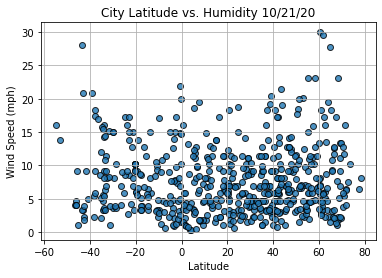

In [41]:
# Build the scatter plot for latitude vs. wind_speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()